In [ ]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-03-20 04:25:32--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [                <=> ]  22.62M  6.88MB/s    in 3.6s    

2025-03-20 04:25:36 (6.35 MB/s) - ‘online+retail.zip’ saved [23715478]



In [ ]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


### Data Load

In [ ]:
df1 = pd.read_excel('Online Retail.xlsx', dtype={'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country':'string'})
df1.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df1.shape

(541909, 8)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


### Data Cleaning: Handling Missing Values

In [ ]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


From this we can analyse that we have 1454 datas are null in description column

In [ ]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [ ]:
df1[df1.StockCode=="22139"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [ ]:
df1[df1.StockCode=="22139"].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [ ]:
most_freq = df1[['StockCode', 'Description']].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35833P,check,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1
4790,21414,SCALLOP SHELL SOAP DISH,1


In [ ]:
most_freq[most_freq.StockCode=='85123A'].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [ ]:
most_freq = most_freq.groupby("StockCode").head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4784,35832,WOOLLY HAT SOCK GLOVE ADVENT STRING,1
4785,35833G,4 GOLD FLOCK CHRISTMAS BALLS,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1


In [ ]:
most_freq.columns = ["StockCode","Freq_Description","Count"]

df2 = df1.merge(most_freq, on="StockCode", how ="left")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Freq_Description,Count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [ ]:
df2['Description'] = df2['Freq_Description']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Freq_Description,Count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [ ]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
Freq_Description,112
Count,112


In [ ]:
df2.dropna(subset = ["Description"], inplace= True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Freq_Description,Count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


Here it tends to drop the rows where any record in the description column contains null values

In [ ]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
Freq_Description,0
Count,0


In [ ]:
df2.drop(columns = ["Freq_Description", "Count"], inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [ ]:
df2[df2.Quantity<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
df2[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
df3 = df2[(df2.UnitPrice>0) & (df2.Quantity>0)]
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [ ]:
df3.Quantity.quantile(0.99)

np.float64(100.0)

99% of all the records contains quantity 100 or less.

In [ ]:
df3.Quantity.quantile(0.9999)

np.float64(1439.8763999990188)

In [ ]:
df3[df3.Quantity>1500]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom
52710,540815,21175,GIN + TONIC DIET METAL SIGN,2000,2011-01-11 12:55:00,1.85,15749.0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
80742,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2011-02-03 10:50:00,0.21,16333.0,United Kingdom
87631,543669,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2011-02-11 11:22:00,0.94,16029.0,United Kingdom


Quantile method so remove anything which has quantity greater than 99.99% quantile

### Feature Engineering - Creating new columns for our analysis

In [ ]:
df4 = df3.copy()
df4['TotalPrice'] = df4.Quantity * df4.UnitPrice
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Trend Analysis

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  string        
 1   StockCode    530104 non-null  string        
 2   Description  530104 non-null  string        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  string        
 8   TotalPrice   530104 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), string(4)
memory usage: 40.4 MB


In [ ]:
df4['Month'] = df4['InvoiceDate'].dt.month
df4.sample(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
115555,546133,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-03-09 15:20:00,8.50,14291.0,United Kingdom,17.00,3
188560,553045,21937,STRAWBERRY PICNIC BAG,50,2011-05-13 09:33:00,2.55,12770.0,Japan,127.50,5
30616,538877,21671,RED SPOT CERAMIC DRAWER KNOB,1,2010-12-14 15:29:00,3.36,NaN,United Kingdom,3.36,12
5518,536864,21870,I CAN ONLY PLEASE ONE PERSON MUG,1,2010-12-03 11:27:00,3.36,NaN,United Kingdom,3.36,12


### Visualization & EDA

#### 1.Plot Monthly Sales

In [ ]:
monthly_sales = df4.groupby("Month")["TotalPrice"].sum()
monthly_sales

,TotalPrice
Month,
1,691364.560
2,523631.890
3,717639.360
4,537808.621
5,770536.020
6,761739.900
7,719221.191
8,759138.380
9,1058590.172


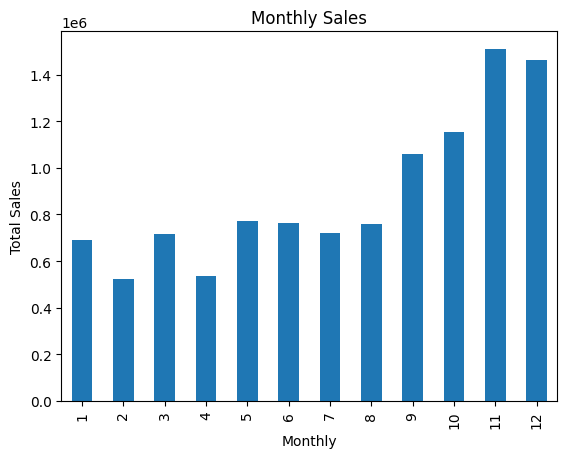

In [ ]:
monthly_sales = df4.groupby("Month")["TotalPrice"].sum()
monthly_sales.plot(kind="bar",title= "Monthly Sales")
plt.xlabel("Monthly")
plt.ylabel("Total Sales")
plt.show()

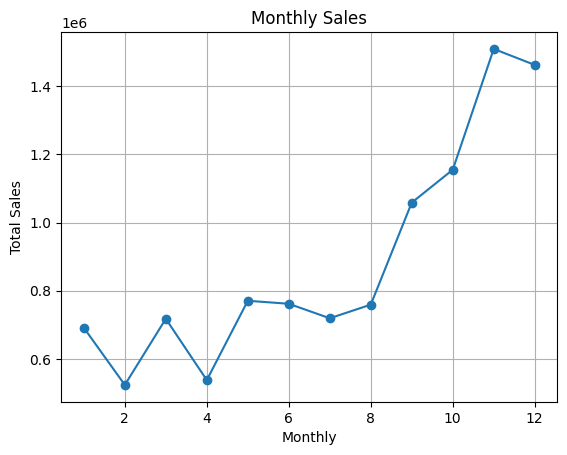

In [ ]:
monthly_sales = df4.groupby("Month")["TotalPrice"].sum()
monthly_sales.plot(kind="line",title= "Monthly Sales",marker= "o")
plt.xlabel("Monthly")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

##### Insights
Total sales started rising ip in August having a peek in November. This is likely due to the holiday season at the end of the year.

#### 2.Top 5 Countries

In [ ]:
top_5_countries = df4.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5)
top_5_countries

,TotalPrice
Country,
United Kingdom,9025222.084
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110


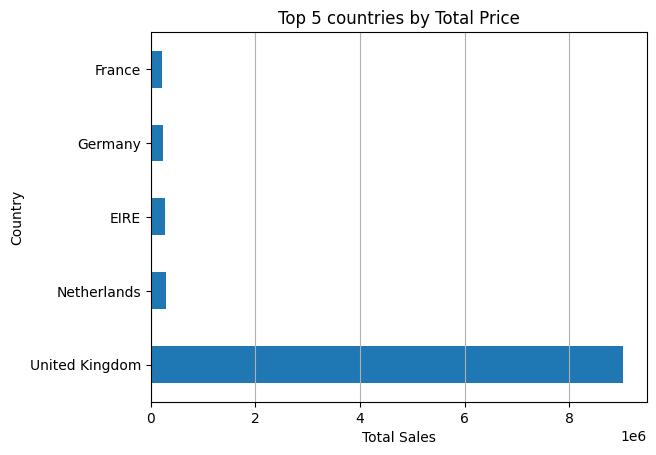

In [ ]:
top_5_countries.plot(kind='barh',title='Top 5 countries by Total Price')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.grid(axis='x')
plt.show()

#### 3.Product wise sales

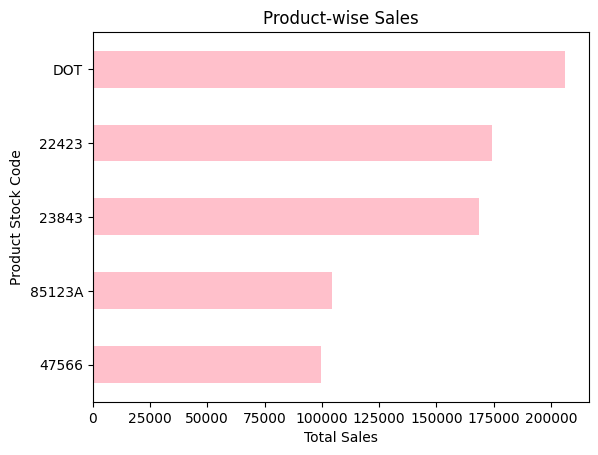

In [ ]:
product_wise_sales = df4.groupby('StockCode')['TotalPrice'].sum()

top_5_products = product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh', color='pink')
plt.title('Product-wise Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock Code')
plt.gca().invert_yaxis()                       # To show the highest sales at the top
plt.show()

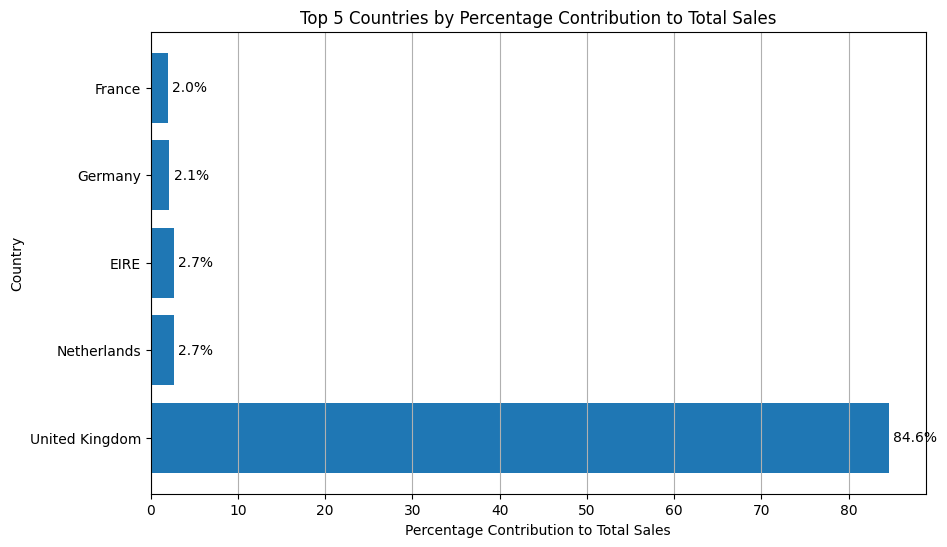

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot as plt

# Assuming df4 is already created as in the previous code

country_wise_sales = df4.groupby('Country')['TotalPrice'].sum()
total_sales = country_wise_sales.sum()

top_5_countries = country_wise_sales.sort_values(ascending=False).head(5)
percentages = (top_5_countries/total_sales) * 100

plt.figure(figsize= (10,6))

# Adjust figure size for better visualization

bars = plt.barh(top_5_countries.index, percentages)
plt.title('Top 5 Countries by Percentage Contribution to Total Sales')
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Country')
plt.grid(axis = 'x')

# Add percentage labela on the bars

for bar, percentage in zip(bars, percentages):
  plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%',
           va='center')

plt.show()


In [ ]:
product_wise_sales.sort_values(ascending=False)

,TotalPrice
StockCode,
DOT,206248.770
22423,174484.740
23843,168469.600
85123A,104518.800
47566,99504.330
...,...
90084,0.850
21268,0.840
51014c,0.830


In [ ]:
product_wise_sales.sum()

np.float64(10666684.544)

In [ ]:
df4[df4.StockCode=='DOT']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,569.77,12
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,607.49,12
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,254.43,12
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,121.06,12
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,498.47,12
...,...,...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,1008.96,12
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,1683.75,12
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom,938.59,12
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom,933.17,12


In [ ]:
for stock_code in top_5_products.index:
  description = df4[df4.StockCode==stock_code].Description.iloc[0]
  print(f"{stock_code} ==> {description}")

DOT ==> DOTCOM POSTAGE
22423 ==> REGENCY CAKESTAND 3 TIER
23843 ==> PAPER CRAFT , LITTLE BIRDIE
85123A ==> WHITE HANGING HEART T-LIGHT HOLDER
47566 ==> PARTY BUNTING


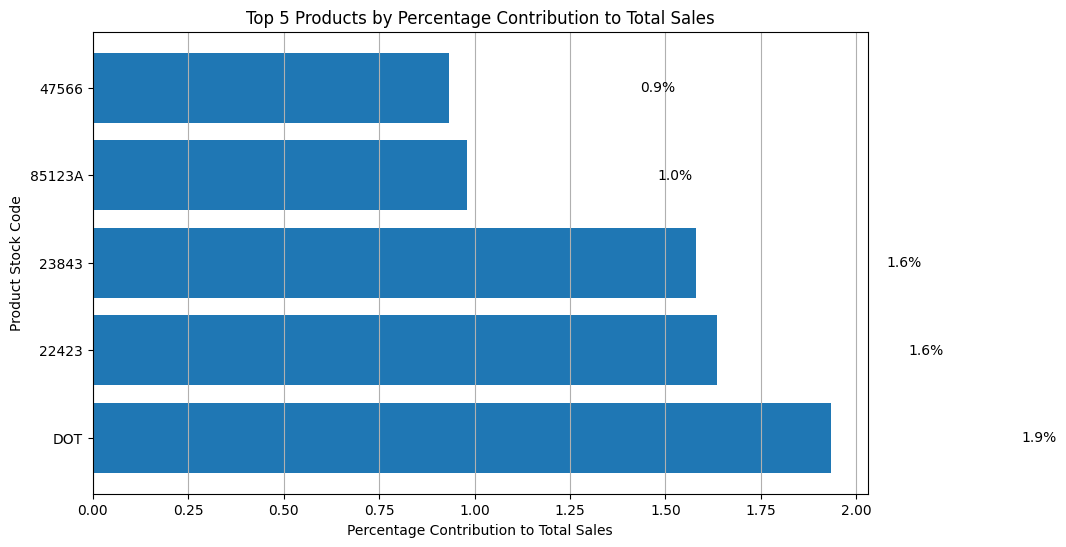

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot as plt

# Assuming df4 is already created as in the previous code

total_sales = product_wise_sales.sum()
percentages = (top_5_products/total_sales) * 100

plt.figure(figsize= (10,6))

# Adjust figure size for better visualization

bars = plt.barh(top_5_products.index, percentages)
plt.title('Top 5 Products by Percentage Contribution to Total Sales')
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Product Stock Code')
plt.grid(axis = 'x')

# Add percentage labela on the bars

for bar, percentage in zip(bars, percentages):
  plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%',
           va='center')

plt.show()

#### 4.RFM Analysis

In [ ]:
df4["InvoiceDate"].max() + pd.Timedelta(days=1)

Timestamp('2011-12-10 12:50:00')

In [ ]:
current_dt = df4['InvoiceDate'].max() + pd.Timedelta(days=1)
current_dt

Timestamp('2011-12-10 12:50:00')

In [ ]:
rfm = df4.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (current_dt - x.max()).days,   # recency values
    "InvoiceNo": "count",                                   # frequency
    "TotalPrice": "sum"                                     # Monetary

})

rfm.columns = ['Recency','Frequency', 'Monetary']
rfm.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:
df4[df4.CustomerID ==12347]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,25.20,12
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,17.00,12
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,39.00,12
14941,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland,23.40,12
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,15.00,12
...,...,...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,2011-12-07 15:52:00,0.85,12347.0,Iceland,8.50,12
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,2011-12-07 15:52:00,1.95,12347.0,Iceland,23.40,12
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,2011-12-07 15:52:00,0.83,12347.0,Iceland,13.28,12
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,2011-12-07 15:52:00,0.42,12347.0,Iceland,8.40,12


In [ ]:
df4[df4.CustomerID ==12347]['TotalPrice'].sum()

np.float64(4310.000000000001)

In [ ]:
# Segemnt Customers based on RFM
rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1,2,3,4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])
rfm['RFM_Score'] = rfm[['R_Segment','F_Segment','M_Segment']].sum(axis=1)
rfm

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,182,4310.00,4,4,4,12
12348.0,75,31,1797.24,2,2,4,8
12349.0,19,73,1757.55,3,3,4,10
12350.0,310,17,334.40,1,1,2,4
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,3
18281.0,181,7,80.82,1,1,1,3
18282.0,8,12,178.05,4,1,1,6


In [ ]:
# Customers with highest RFM_Score

rfm.sort_values('RFM_Score', ascending= False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
18198.0,4,159,5425.56,4,4,4,12
18210.0,2,134,2621.38,4,4,4,12
18225.0,3,271,5509.12,4,4,4,12
18283.0,4,756,2094.88,4,4,4,12
16983.0,13,148,1931.25,4,4,4,12
...,...,...,...,...,...,...,...
12402.0,323,11,225.60,1,1,1,3
18185.0,249,17,304.25,1,1,1,3
18190.0,192,15,284.46,1,1,1,3


#### 5.Customer Churn Analysis

In [ ]:
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [ ]:
# create a basket matrix for association rule mining

customer_last_purchase = df4.groupby("CustomerID")["InvoiceDate"].max()
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [ ]:
type(customer_last_purchase)

pandas.core.series.Series

In [ ]:
current_dt

Timestamp('2011-12-10 12:50:00')

In [ ]:
customer_last_purchase = (current_dt - customer_last_purchase).dt.days
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


In [ ]:
# define churn threshold (e.g., 90 days without purchase)

churn_threshold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


Number of Churned Customers: 1449


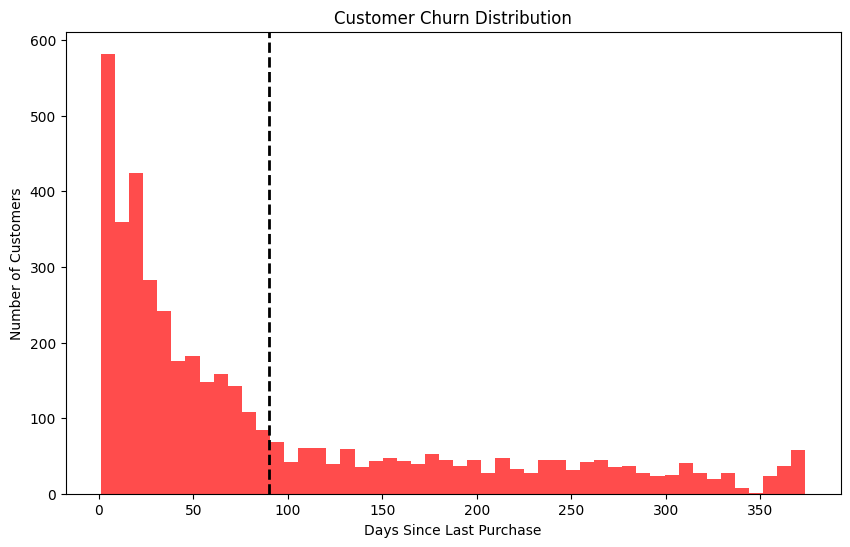

In [ ]:
print("Number of Churned Customers:", len(churned_customers))
plt.figure(figsize = (10,6))
plt.hist(customer_last_purchase, bins=50, color='red', alpha = 0.7)
plt.axvline(churn_threshold, color='black', linestyle = 'dashed', linewidth =2)
plt.title('Customer Churn Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()